In [1]:
import os

import numpy as np
import scipy as sp
import pandas as pd
import mesa_web as mw
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from ipywidgets import interact, IntSlider

import seaborn as sns

# Set plotting style 
sns.set(style="ticks", palette="muted", 
        rc={"xtick.bottom" : True, "ytick.left" : True})
# plt.style.use('thinfig')
%config InlineBackend.figure_format = "retina"

## Plots from static composition relaxation procedure

<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'co_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'msun', 'rsun', 'lsun', 'zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'acoustic_radius', 'acoustic_r_div_R

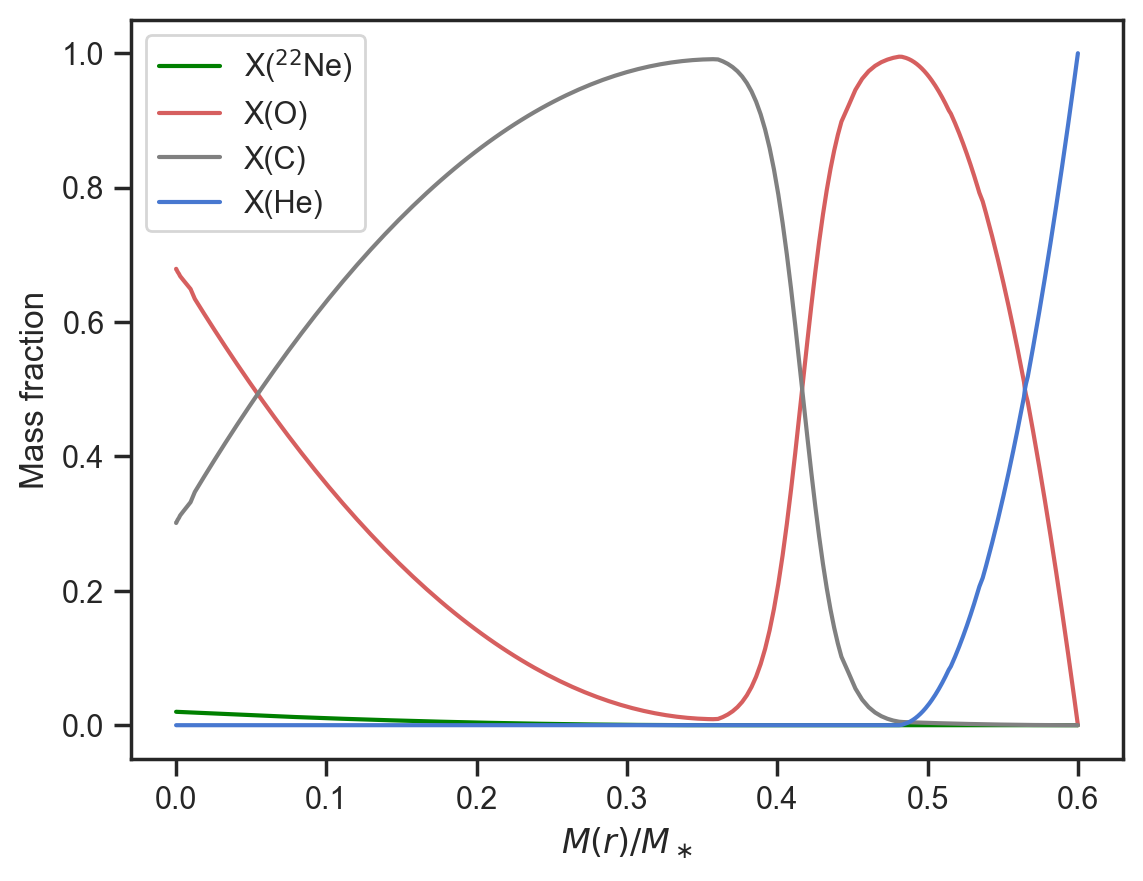

/var/folders/b_/91swq2f51r35gl42858jqwd00000gn/T/ipykernel_6911/1284869167.py:24: RuntimeWarning: divide by zero encountered in log10
  x  = -np.log10(1 - mass/Mstar)


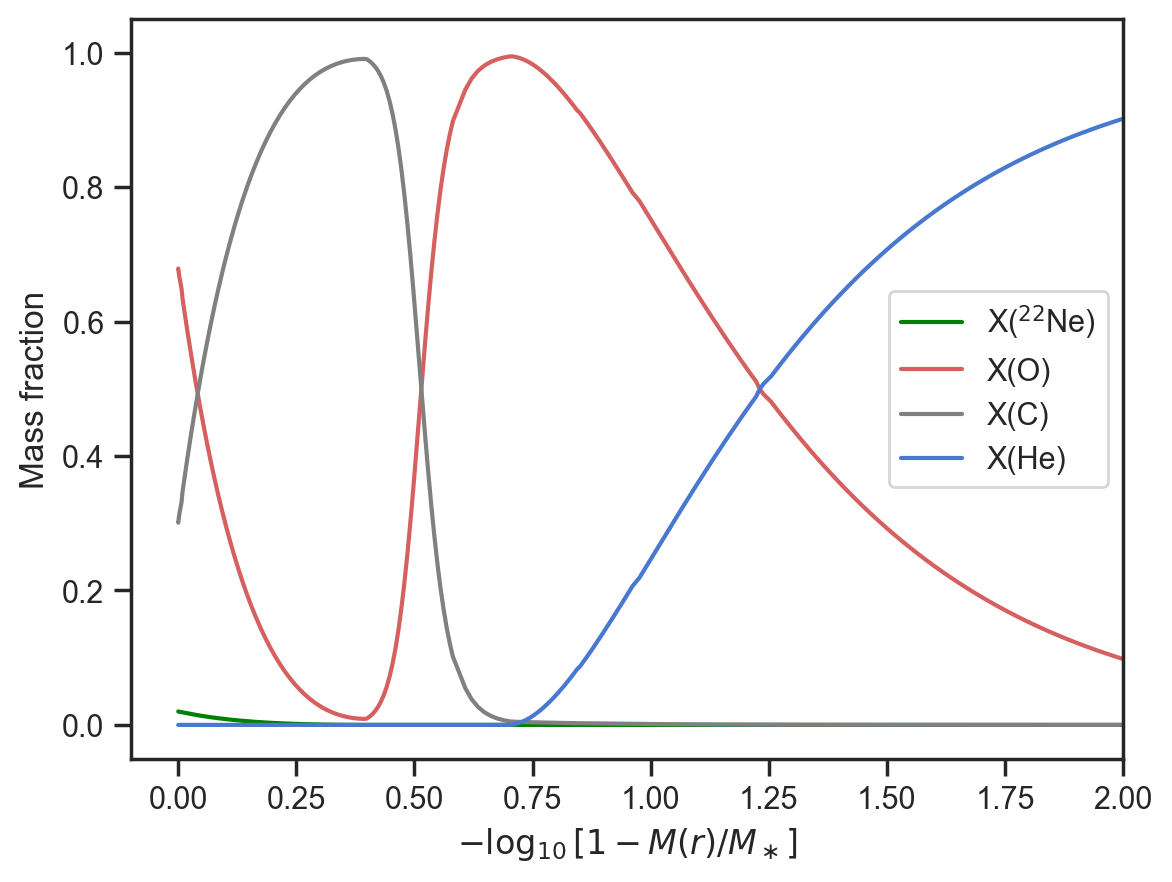

In [27]:
# using make_wd_slope_model_split_transition.py (where I have tried to correct C composition profile)

data_wd_b = mw.read_profile('/Users/surendrabhattarai/MESA/WD Project/creating_WD_builder_my_trial [for static composition relaxing model]/work/LOGS_improving_C_trend/0.600_Msun_mcore=0.60000_mgrad=0.20000/profile6.data')
print(type(data_wd_b))
print(data_wd_b.keys())
mass = data_wd_b['mass']
# Mstar = 5.3758513004984732e-001
# x = -np.log10(1 - mass/Mstar)
x  = mass
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
# plt.xlim(0,10)
# plt.ylim(-0.1,1)
plt.show()

Mstar = 0.6
x  = -np.log10(1 - mass/Mstar)
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
plt.xlim(-0.1,2)
# plt.ylim(-0.2,1)
plt.show()

<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'co_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'msun', 'rsun', 'lsun', 'zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'acoustic_radius', 'acoustic_r_div_R

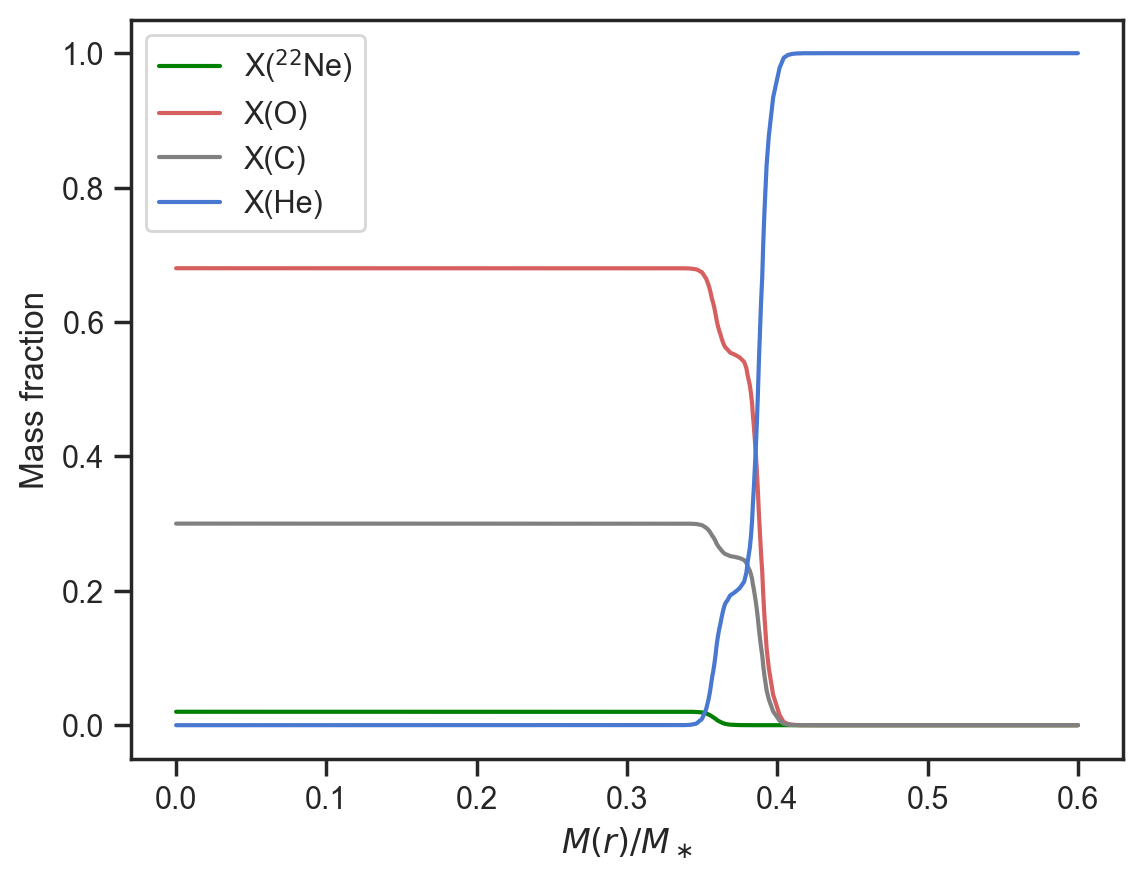

/var/folders/b_/91swq2f51r35gl42858jqwd00000gn/T/ipykernel_6911/754487511.py:24: RuntimeWarning: divide by zero encountered in log10
  x  = -np.log10(1 - mass/Mstar)


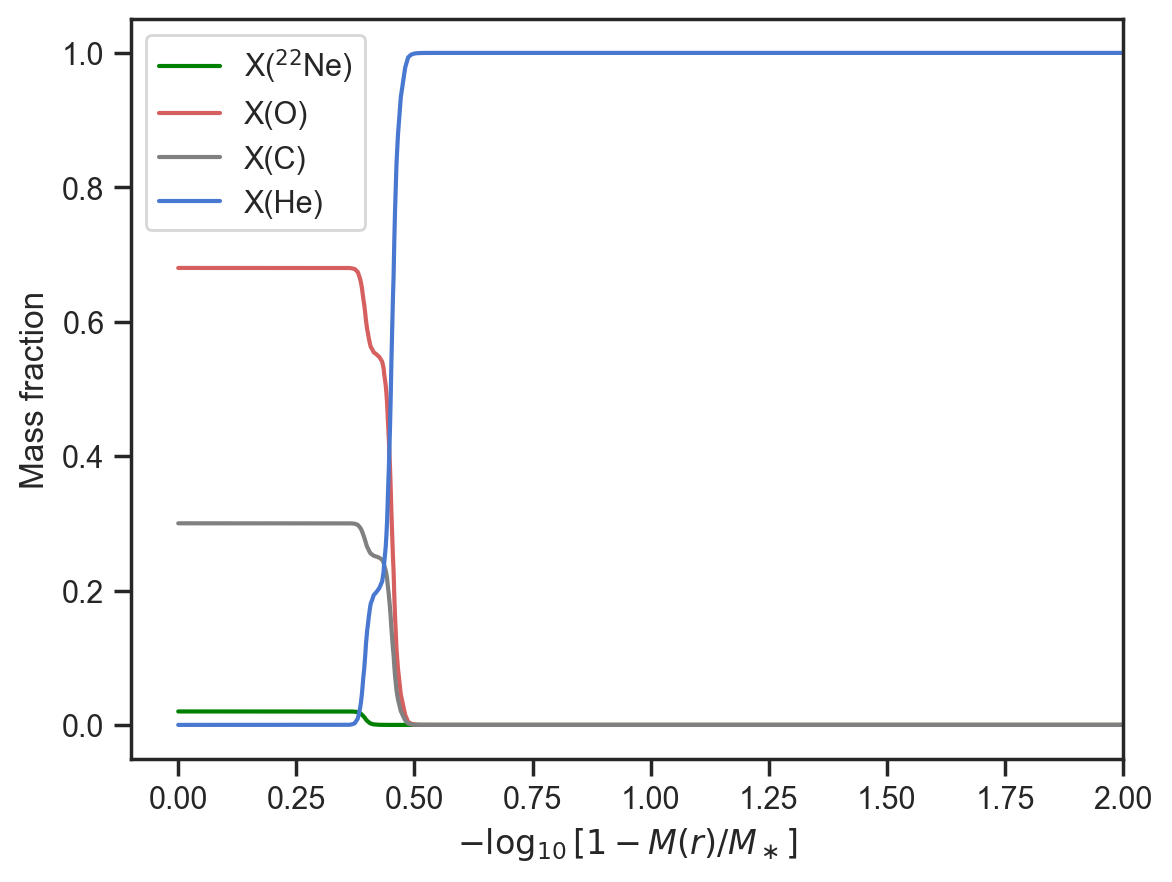

In [21]:
# using split transition (Sigmoid function)

data_wd_b = mw.read_profile('/Users/surendrabhattarai/MESA/WD Project/creating_WD_builder_my_trial [for static composition relaxing model]/work/LOGS_split/0.600_Msun_q1=0.350_q2=0.400_P1=0.005_P2=0.005/profile6.data')
print(type(data_wd_b))
print(data_wd_b.keys())
mass = data_wd_b['mass']
# Mstar = 5.3758513004984732e-001
# x = -np.log10(1 - mass/Mstar)
x  = mass
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
# plt.xlim(0,10)
# plt.ylim(-0.1,1)
plt.show()

Mstar = 0.6
x  = -np.log10(1 - mass/Mstar)
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
plt.xlim(-0.1,2)
# plt.ylim(-0.2,1)
plt.show()

<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'co_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'msun', 'rsun', 'lsun', 'zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'acoustic_radius', 'acoustic_r_div_R

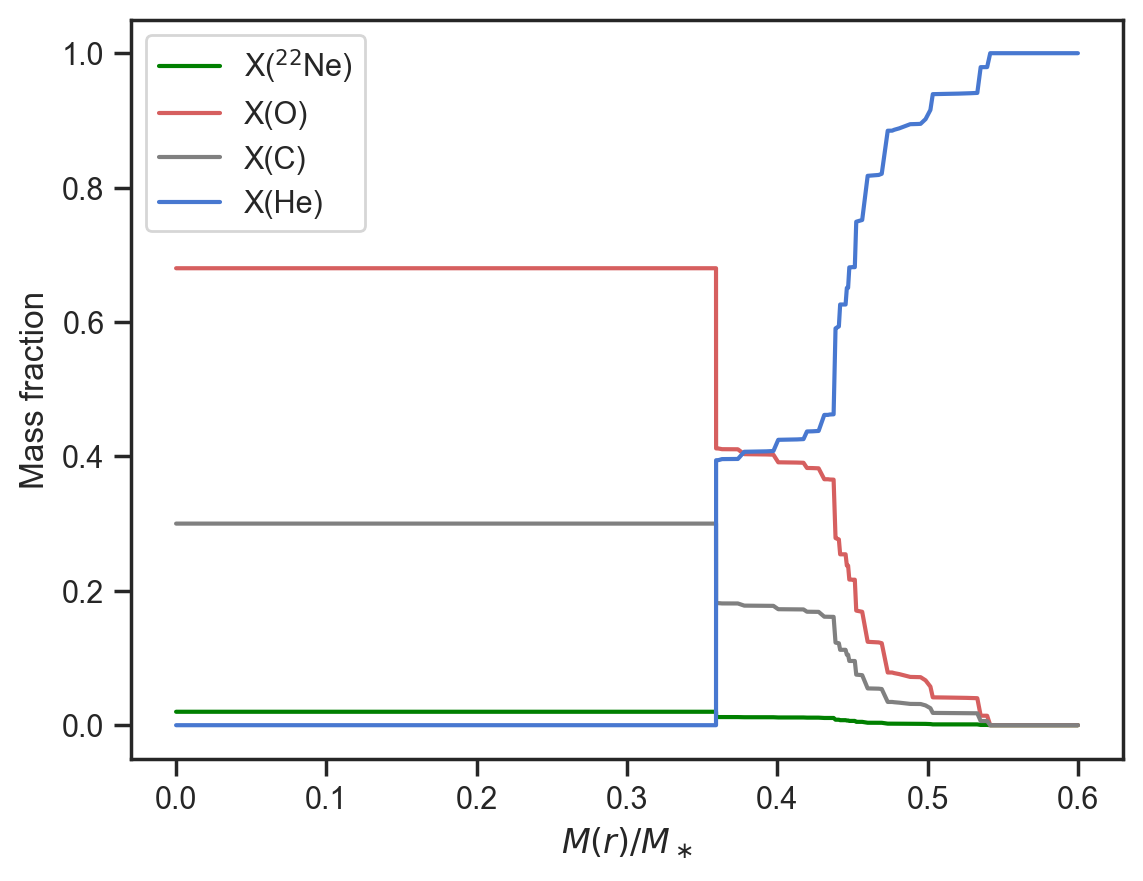

/var/folders/b_/91swq2f51r35gl42858jqwd00000gn/T/ipykernel_6911/1277886927.py:22: RuntimeWarning: divide by zero encountered in log10
  x  = -np.log10(1 - mass/Mstar)


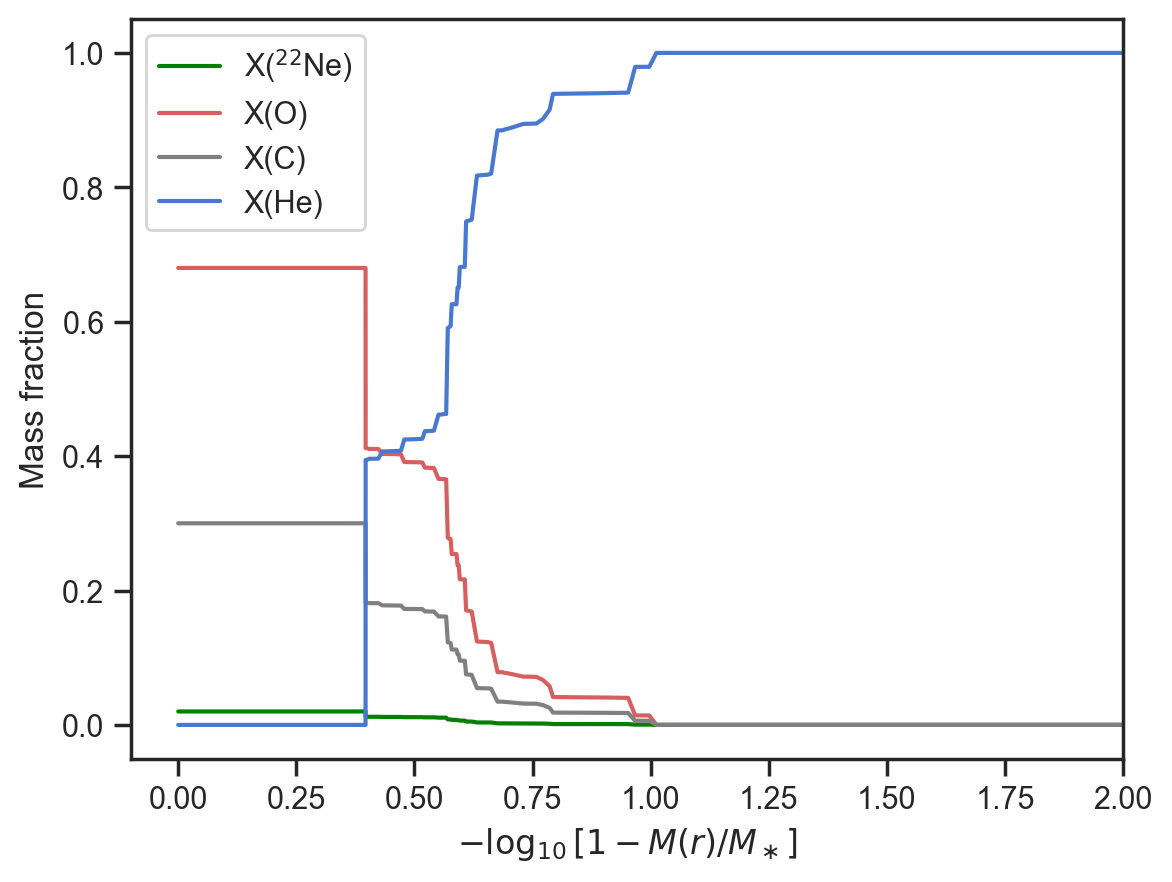

In [22]:


data_wd_b = mw.read_profile('/Users/surendrabhattarai/MESA/WD Project/creating_WD_builder_my_trial [for static composition relaxing model]/work/LOGS/0.600_Msun_mcore=0.600_mgrad=0.200/profile1.data')
print(type(data_wd_b))
print(data_wd_b.keys())
mass = data_wd_b['mass']
# Mstar = 5.3758513004984732e-001
# x = -np.log10(1 - mass/Mstar)
x  = mass
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
# plt.xlim(0,10)
# plt.ylim(-0.1,1)
plt.show()

Mstar = 0.6
x  = -np.log10(1 - mass/Mstar)
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
plt.xlim(-0.1,2)
# plt.ylim(-0.2,1)
plt.show()

<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'co_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'msun', 'rsun', 'lsun', 'zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'acoustic_radius', 'acoustic_r_div_R

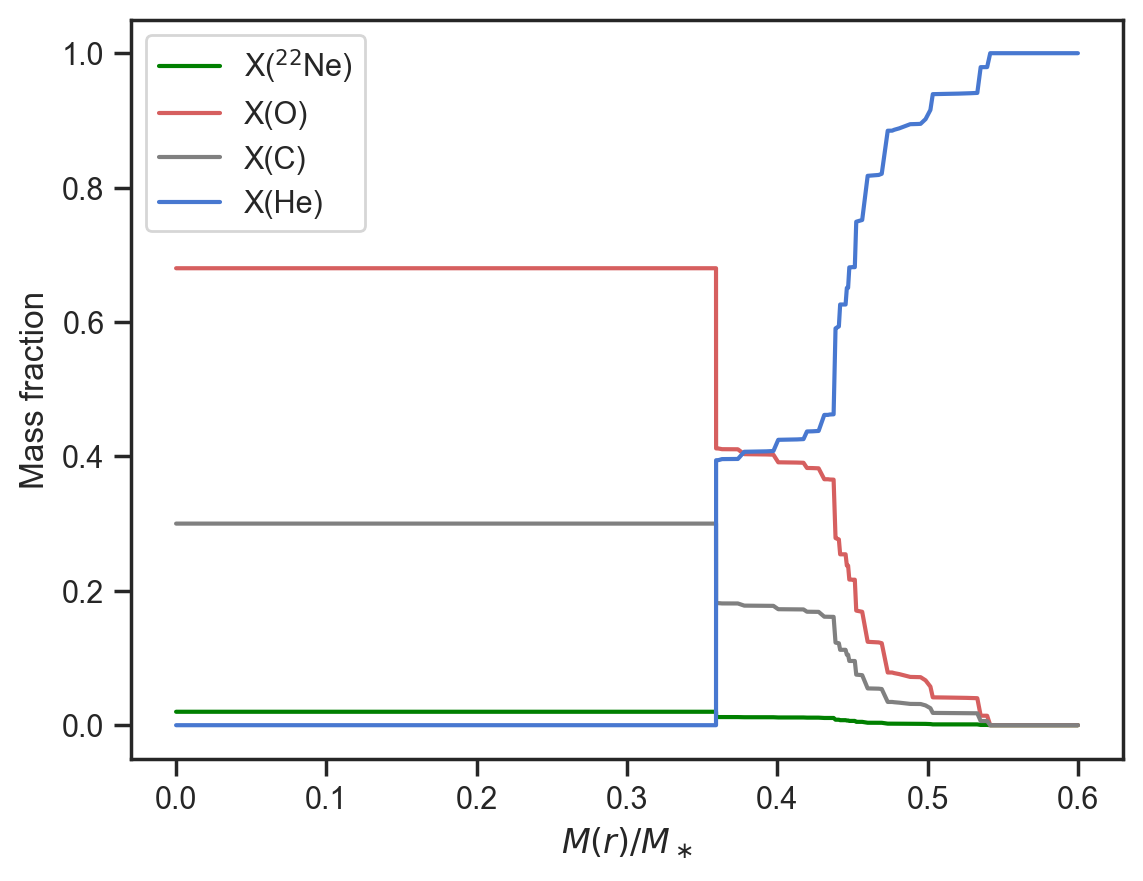

/var/folders/b_/91swq2f51r35gl42858jqwd00000gn/T/ipykernel_6911/3781900399.py:24: RuntimeWarning: divide by zero encountered in log10
  x  = -np.log10(1 - mass/Mstar)


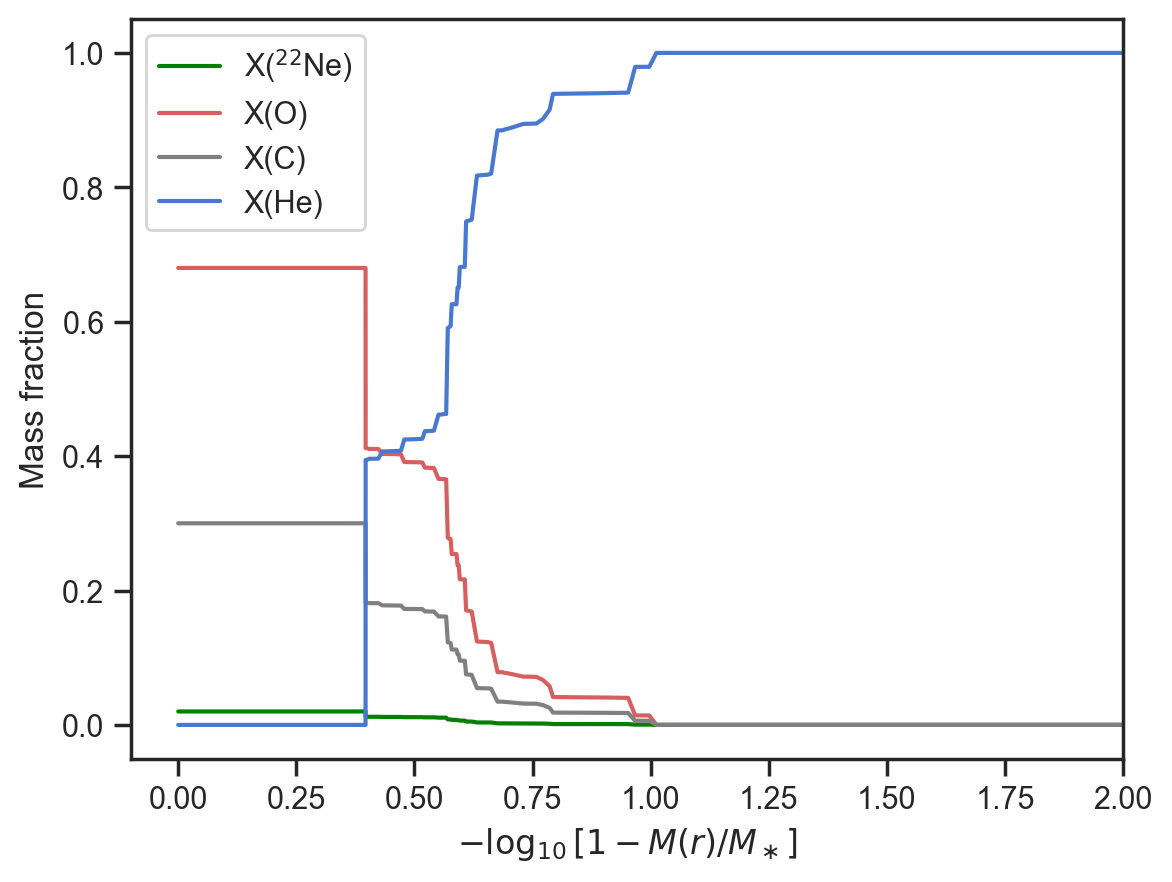

In [ ]:
# with atm_table 'WD_tau_25' - the original WD atmosphere table option for DA (H atmosphere)
# using make_wd_slope_model_try2.py

data_wd_b = mw.read_profile('/Users/surendrabhattarai/MESA/WD Project/creating_WD_builder_my_trial [for static composition relaxing model]/work/LOGS/0.600_Msun_mcore=0.60000_mgrad=0.20000/profile1.data')
print(type(data_wd_b))
print(data_wd_b.keys())
mass = data_wd_b['mass']
# Mstar = 5.3758513004984732e-001
# x = -np.log10(1 - mass/Mstar)
x  = mass
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
# plt.xlim(0,10)
# plt.ylim(-0.1,1)
plt.show()

Mstar = 0.6
x  = -np.log10(1 - mass/Mstar)
plt.plot(x, data_wd_b['ne22'], c='green', label='X($^{22}$Ne)')
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
plt.xlim(-0.1,2)
# plt.ylim(-0.2,1)
plt.show()

<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'co_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'msun', 'rsun', 'lsun', 'zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'acoustic_radius', 'acoustic_r_div_R

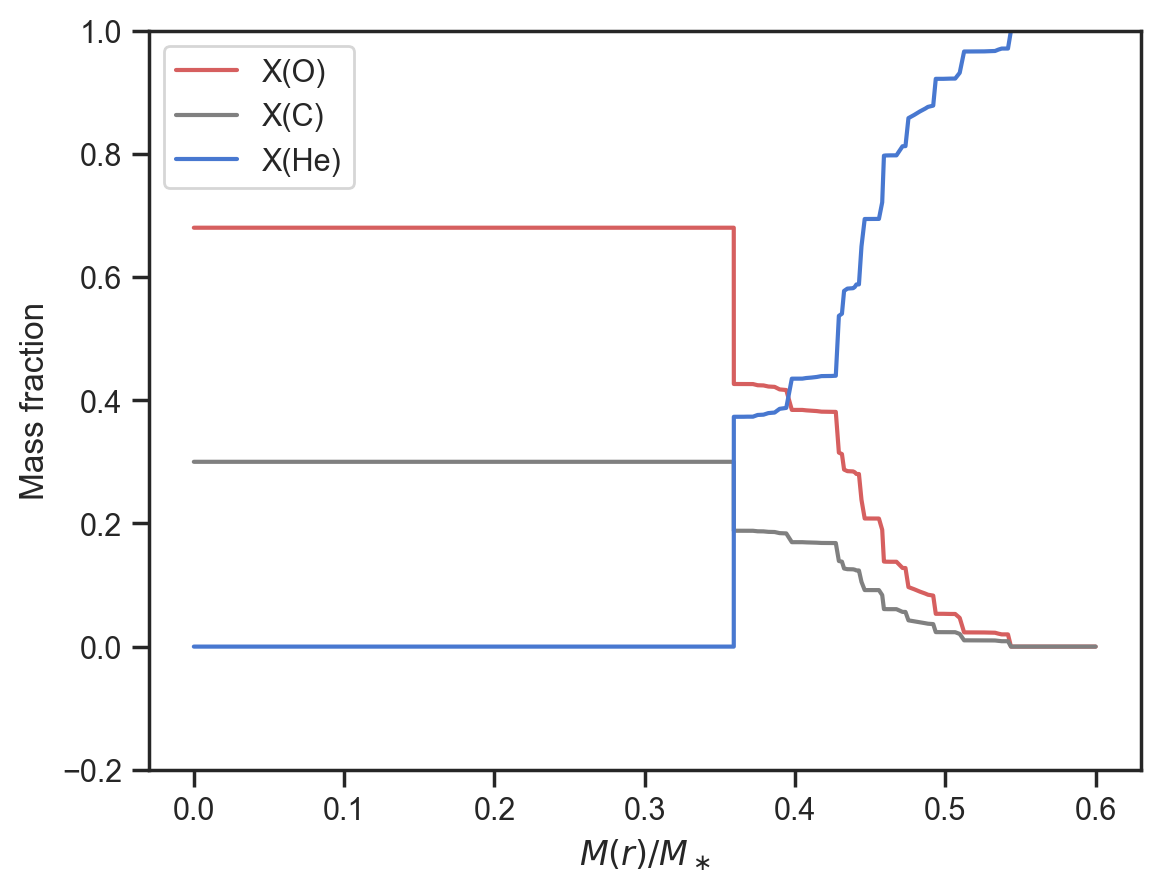

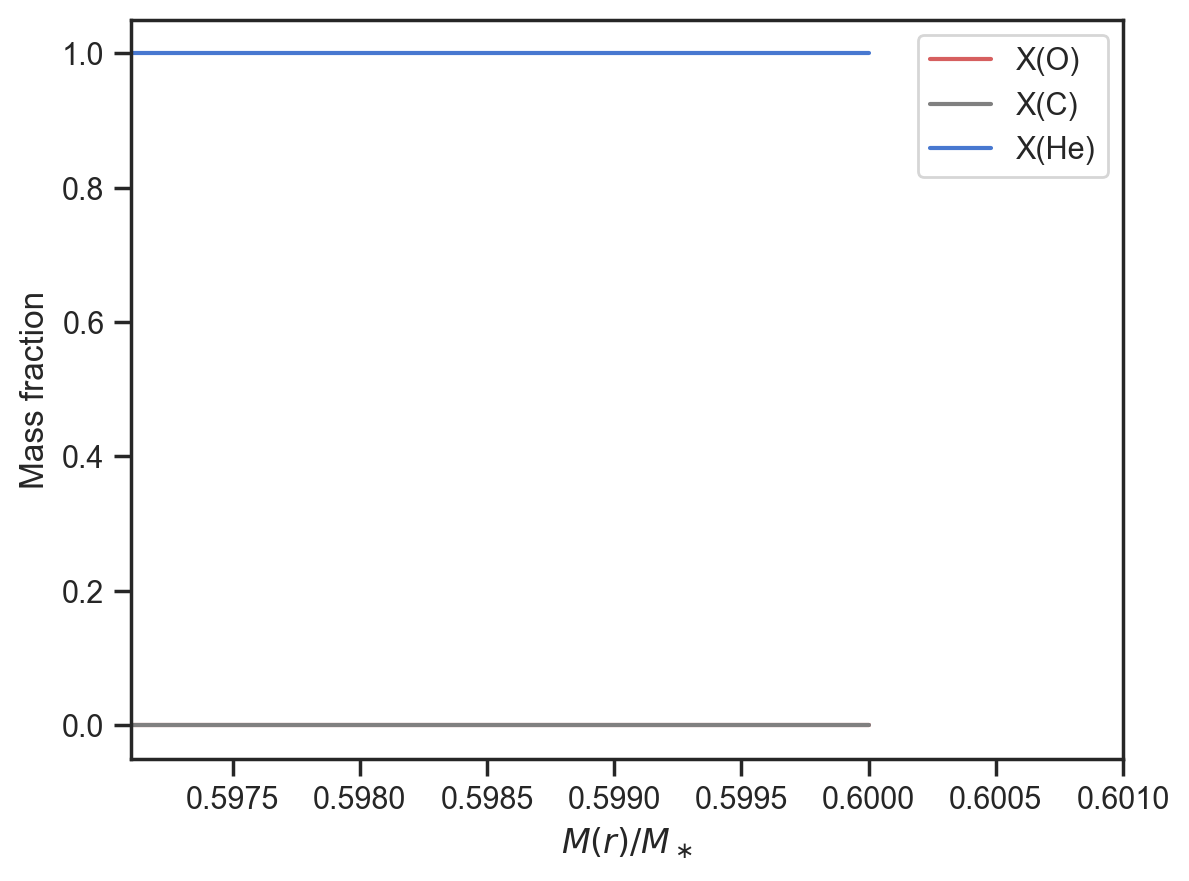

In [ ]:
# with the usual atm_table 'DB_WD_tau_25' - table for DB (He atmosphere) WDs

data_wd_b = mw.read_profile('/Users/surendrabhattarai/MESA/WD Project/creating_WD_builder_my_trial [for static composition relaxing model]/work/LOGS/0.600_Msun_mcore=0.60000_mgrad=0.20000/profile1.data')
print(type(data_wd_b))
print(data_wd_b.keys())
mass = data_wd_b['mass']
# Mstar = 5.3758513004984732e-001
# x = -np.log10(1 - mass/Mstar)
x  = mass
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
# plt.xlim(0,10)
plt.ylim(-0.2,1)
plt.show()


<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'co_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'msun', 'rsun', 'lsun', 'zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'acoustic_radius', 'acoustic_r_div_R

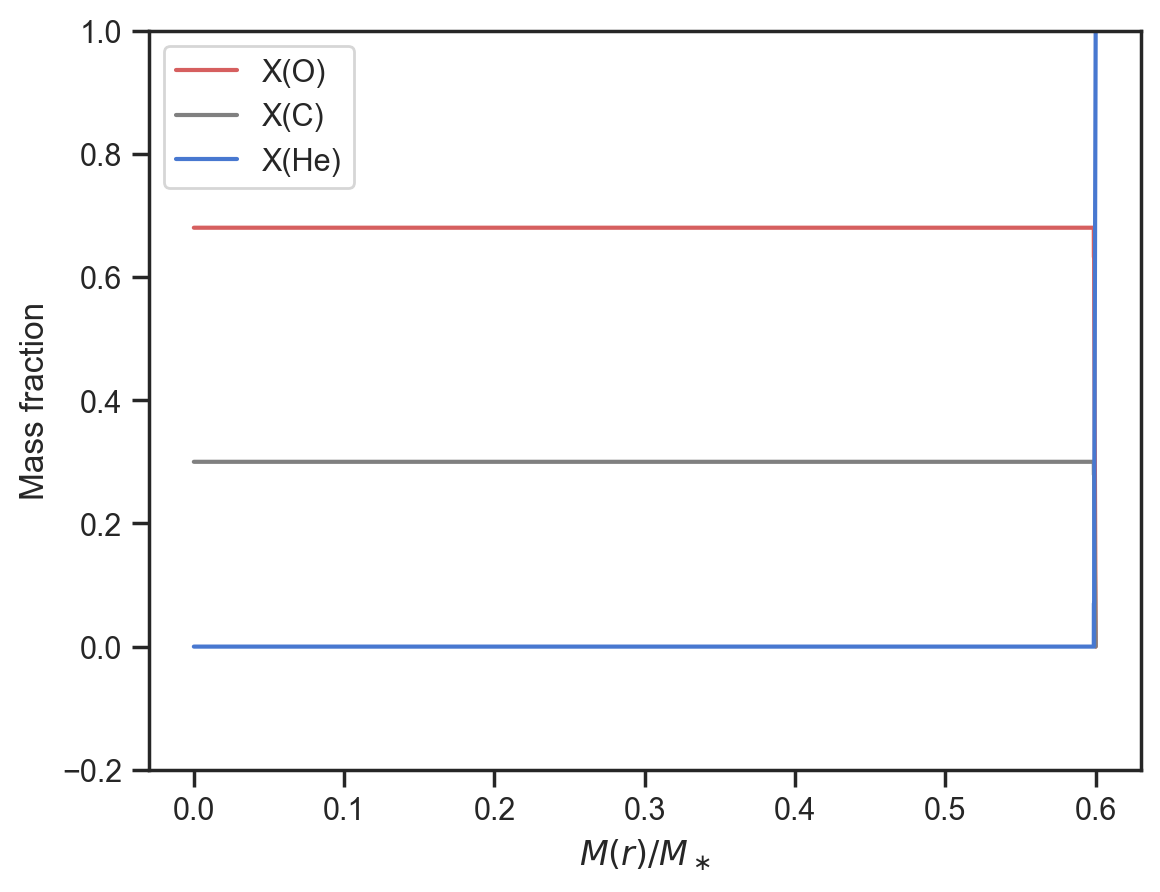

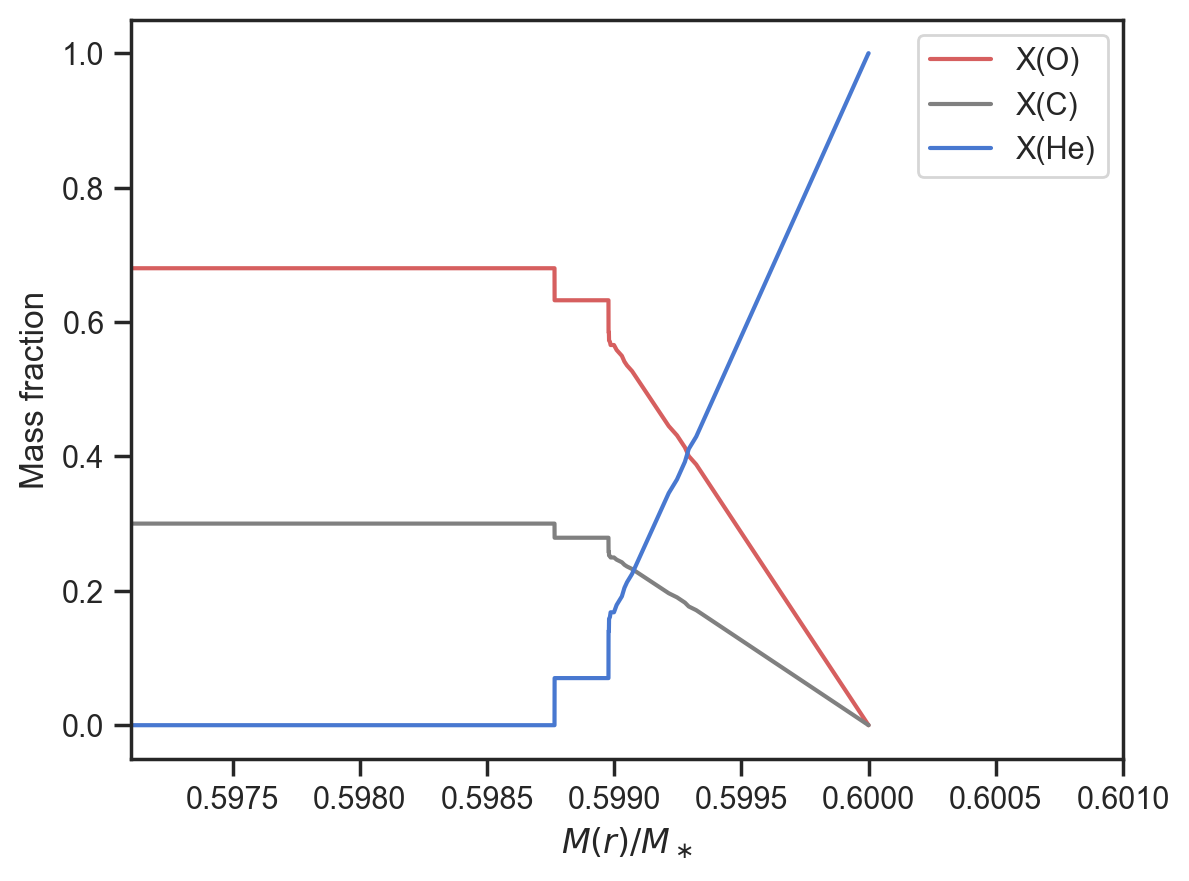

In [ ]:
data_wd_b = mw.read_profile('/Users/surendrabhattarai/MESA/WD Project/creating_WD_builder_my_trial [for static composition relaxing model]/work/LOGS/0.600_Msun_mcore=0.99800_mgrad=0.01000_/profile2.data')
print(type(data_wd_b))
print(data_wd_b.keys())
mass = data_wd_b['mass']
# Mstar = 5.3758513004984732e-001
# x = -np.log10(1 - mass/Mstar)
x  = mass
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
# plt.xlim(0,10)
plt.ylim(-0.2,1)
plt.show()


plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
plt.xlim(0.5971, 0.601)
# plt.xlim(0,10)
# plt.ylim(0,1)
plt.show()

<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'co_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'msun', 'rsun', 'lsun', 'zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'acoustic_radius', 'acoustic_r_div_R

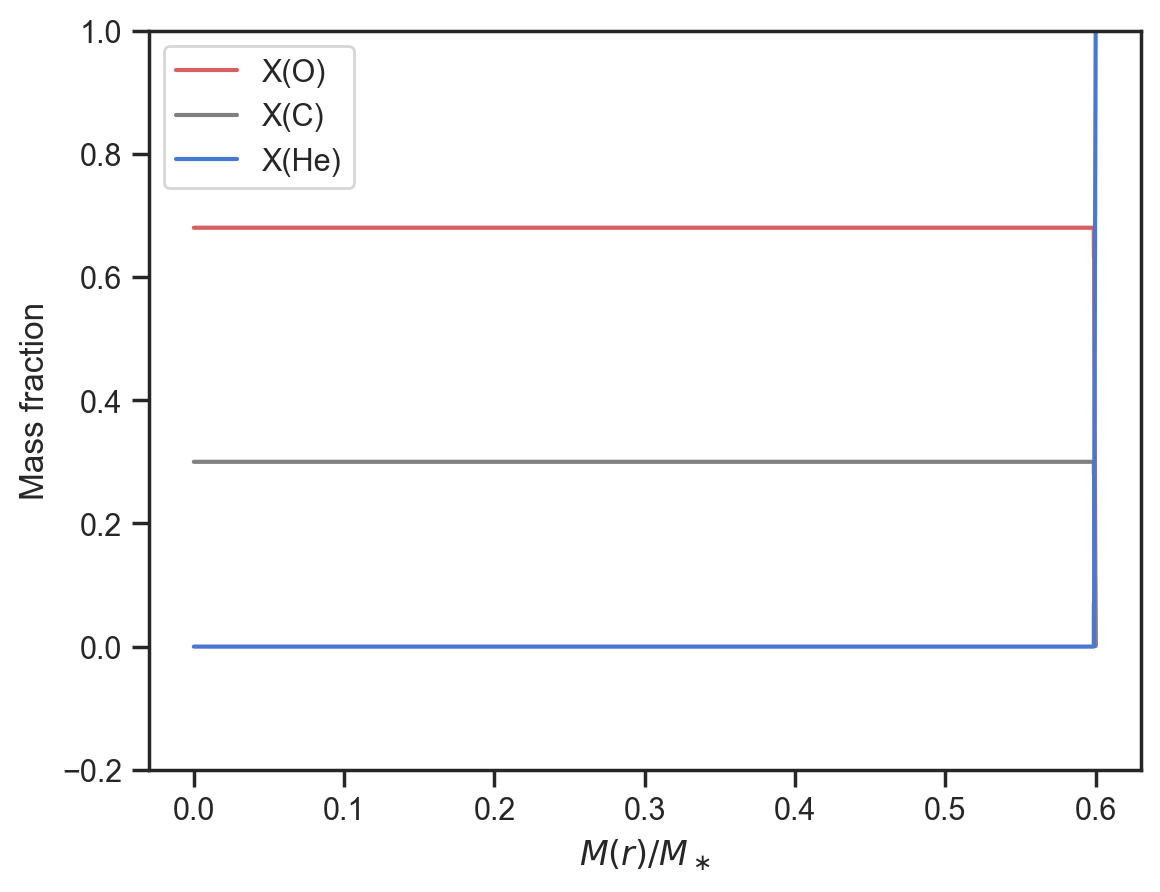

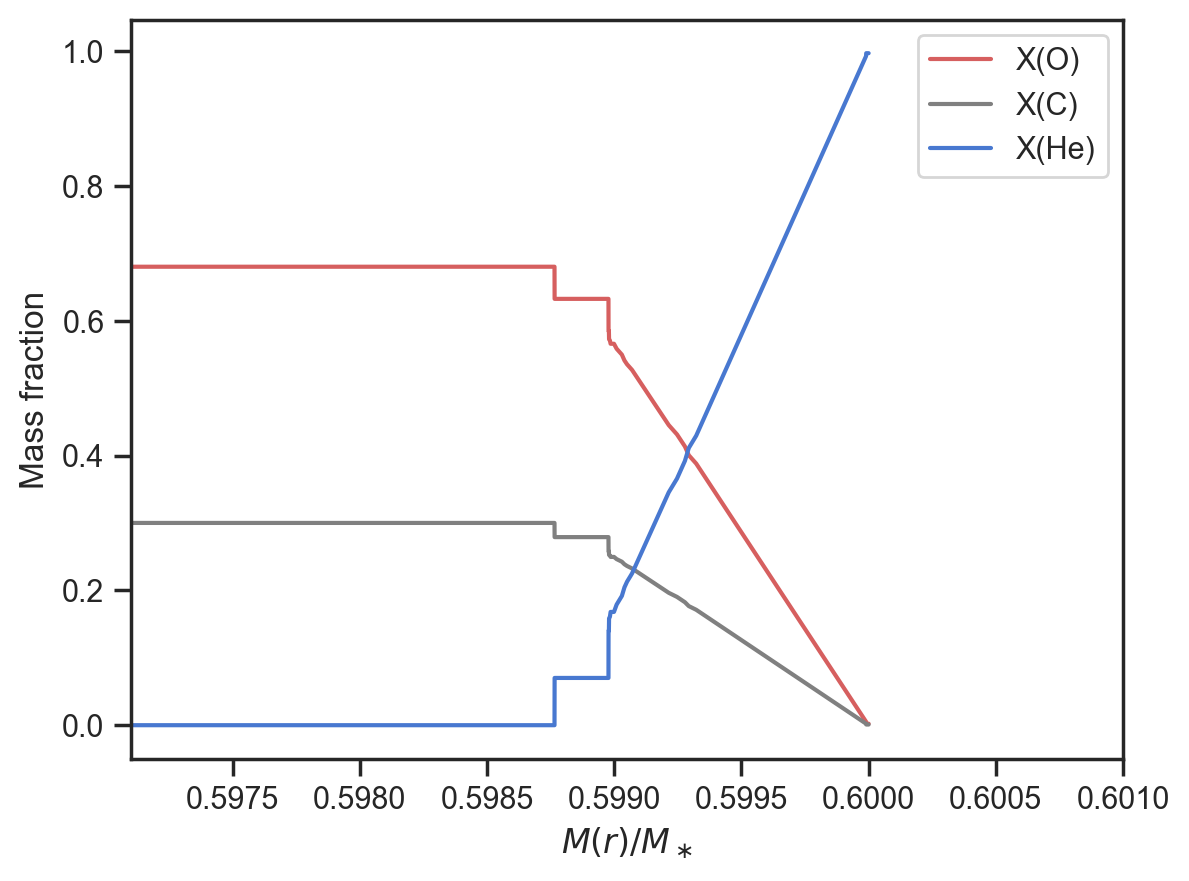

In [ ]:
data_wd_b = mw.read_profile('/Users/surendrabhattarai/MESA/WD Project/creating_WD_builder_my_trial [for static composition relaxing model]/work/LOGS/0.600_Msun_mcore=0.99800_mgrad=0.00200_/profile8.data')
print(type(data_wd_b))
print(data_wd_b.keys())
mass = data_wd_b['mass']
# Mstar = 5.3758513004984732e-001
# x = -np.log10(1 - mass/Mstar)
x  = mass
plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
# plt.xlim(0.597, 0.602)
# plt.xlim(0,10)
plt.ylim(-0.2,1)
plt.show()


plt.plot(x, data_wd_b['o16'], c='C3', label='X(O)')
plt.plot(x, data_wd_b['c12'], c='gray', label='X(C)')
plt.plot(x, data_wd_b['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.xlabel(r'$M(r)/M_\ast$')
plt.ylabel('Mass fraction')
plt.legend()
plt.xlim(0.5971, 0.601)
# plt.xlim(0,10)
# plt.ylim(0,1)
plt.show()